# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [3]:
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [7]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [9]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [11]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?

- En user, la columna city no se cuentan con el 11.72 % de los datos y en la columna churn date no se cuenta con el 88.35%. Para usage la columna duration tenemos el 55.19 de valores faltantes, 44.74 en la columna length y 0.12 % de date.

  
- Indica qué harías: ¿imputar, eliminar, ignorar?

- Para la columna city por el porcentaje los dejaria como nulos; para churn como es un dato que solo se tiene si hay una cancelación, imputaría los faltante como NaN; para duration y length al ser complementarios ya que depende si es llamada o texto, imputaria los faltante como NaN tambien y finalmente para date por el porcentaje tan bajo y al ser información necesaria para el análisis lo eliminaria

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
# explorar columnas numéricas de users
users['age'].describe()

count    4000.000000
mean       33.739750
std       123.232257
min      -999.000000
25%        32.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

- La columna `user_id` ... muestra valores normales consistentes con números de clientes
- La columna `age` ... muestra valores dentro de rangos de edades coherentes, sin emabargo en el valor minimo si encontramos valores -999, 55 líneas las cuales por el porcentaje se deberían de eliminar 

In [13]:
# explorar columnas numéricas de usage
usage['length'].isin([0]).sum()

133

- Las columnas `id` y `user_id`... muestran valores dentro de rangos aceptables para el tupo de datos que manejan
- Las columnas `duration` y `length`... cuentan con valores en 0, 15 para duration y 133 para legth que no son validos

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` cuenta con 469 valores ausentes, 7 valores únicos y el que mayor veces se repite es Bogotá, sin embargo tambien notamos que el sentinel ? esta presente
- La columna `plan` no tienen ningún valor ausente y solamente hay 2 valores únicos, siento Básico el que mayor participación tiene

In [15]:
# explorar columna categórica de usage
usage['type'].describe()

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` no tiene valores ausentes y tiene 2 valores únicos, siento text el que mayor se repite


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?

Encontre sentinels en la tabla de user en las columnas age, duration, length y en city

- ¿Qué acción tomarías?

Yo considero que la mejor opción sería eliminar todas las filas que cuenten con sentinels, porcentualmente representan una cantidad muy baja; sin embargo tambien se podrían imputar con valores como la media o la mediana; con ? en city lo imputaria con NaN

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'])

In [17]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'])

In [18]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.unique()

array([2022, 2026, 2023, 2024])

En `reg_date`, ... se observan fechas de 2026, que al tener información hasta 2024, no es correcta

In [19]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.unique()

array([2024.,   nan])

En `date`, ... vemos información de 2024 que es correcta, sin embargo vemos que hay espacios en blanco y NaNs   
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)

Si, en reg_date hay 40 registros con fecha de 2026 que no son validas y en date vemos 50 registros con fecha NaN

- ¿Qué harías con ellas?

Al ser valores que no se pueden imputar con valores estadisticos y al no representar una cantidad alta porcentualmente lo ideal es eliminarlos 

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age
age_mediana = users[users['age'] != -999]['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [22]:
# Marcar fechas futuras como NA para reg_date
fecha_limite = pd.Timestamp('2024-12-31')
users.loc[users['reg_date'] > fecha_limite, 'reg_date'] = pd.NaT

# Verificar cambios
users['reg_date'].dt.year.unique()


array([2022.,   nan, 2023., 2024.])

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
print(pd.crosstab(usage['type'], usage['duration'].isna(), normalize='index') * 100)

duration       False      True 
type                           
call      100.000000   0.000000
text        0.072424  99.927576


In [24]:
# Verificación MAR en usage (Missing At Random) para length
print(pd.crosstab(usage['type'], usage['length'].isna(), normalize='index') * 100)

length       False      True 
type                         
call      0.067009  99.932991
text    100.000000   0.000000


Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

Ambas columnas depende de type, cuando es call duration tiene valor y length es nulo y cuando es text length tiene valor y duration es nulo; por lo que se mantendrán como nulos.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',      
    'is_call': 'sum',       
    'duration': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:
# Renombrar columnas
usage_agg.columns = ['user_id', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on='user_id', how='left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
numeric_cols = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
user_profile[numeric_cols].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [29]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True)

Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

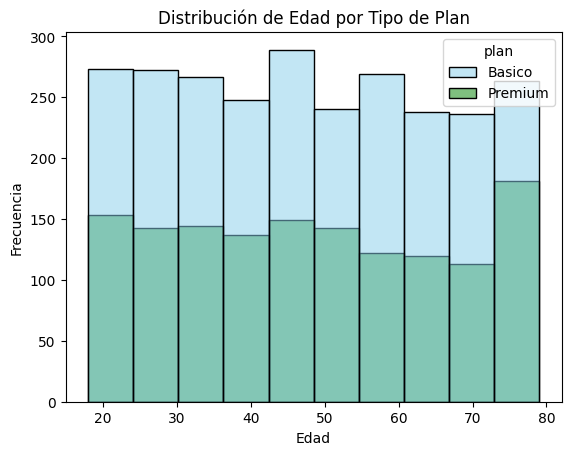

In [30]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x='age', hue='plan', bins=10, palette=['skyblue','green'], edgecolor='black')
plt.title('Distribución de Edad por Tipo de Plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución

Vemos una distribución muy simetrica con algunos picos, como que el rango de edad de entre 40 y 50 años es donde más usuarios hay; sin embargo tambien observamos que la distribución de plan es muy similar en todos los rangos de edad a excepción del rango de 70 a 80 donde el plan premium es claramente el que tiene mayor representación

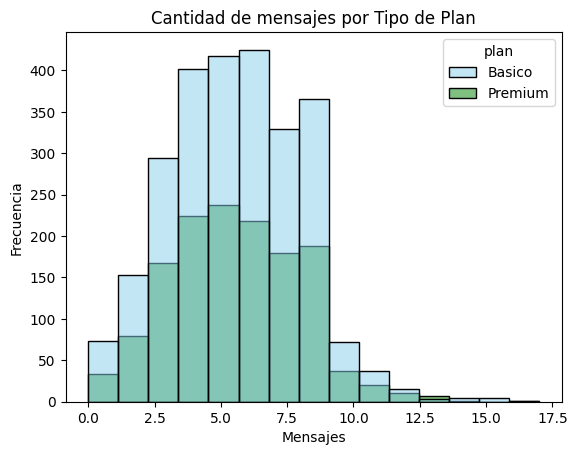

In [31]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x='cant_mensajes', hue='plan', bins=15, palette=['skyblue','green'], edgecolor='black')
plt.title('Cantidad de mensajes por Tipo de Plan')
plt.xlabel('Mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución

Podemos observar que existe un pequeño sego a la derecha; sin embargo la cantidad de mensajes se centra entre 2.5 y 7.5, siendo alrededor de 5 donde se encuentra el mayor pico; tambien podemos ver que la distribuciones entre planes es simetrica 

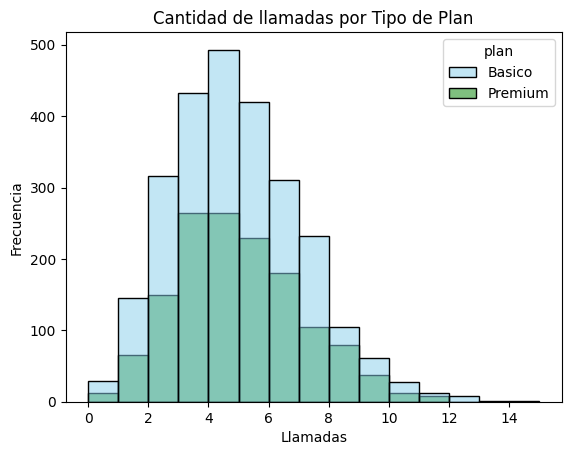

In [32]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x='cant_llamadas', hue='plan', bins=15, palette=['skyblue','green'], edgecolor='black')
plt.title('Cantidad de llamadas por Tipo de Plan')
plt.xlabel('Llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución

Observamos un pequeño sesgo a la derecha; sin embargo la cantidad de llmadas se centra entre 3 y 6 siendo el pico en 4; en general en la mayoria de columnas observamos simetria entre los planes pero se puede apreciar que el plan premium tiene mayor proporción en números más grande de llamadas

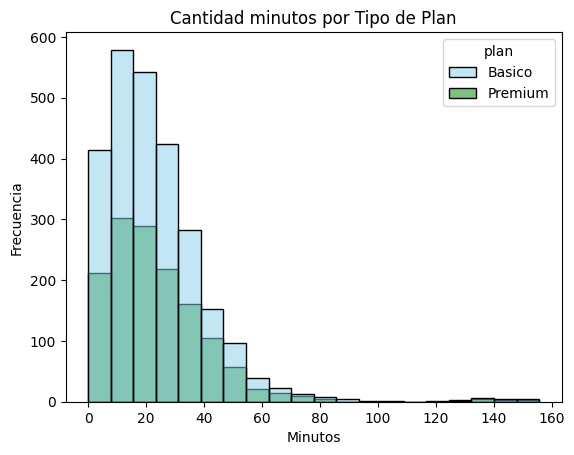

In [33]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x='cant_minutos_llamada', hue='plan', bins=20, palette=['skyblue','green'], edgecolor='black')
plt.title('Cantidad minutos por Tipo de Plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Distribución

Vemos un claro sesgo a la derecha que nos indica que la mayor cantidad se centra a la izquierda y encontramos el mayor pico aproximadamente en 10 minutos; tambien se observa simetria entre los planes, aunque el plan premium tiene mayor proporción conforme suben los minutos

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

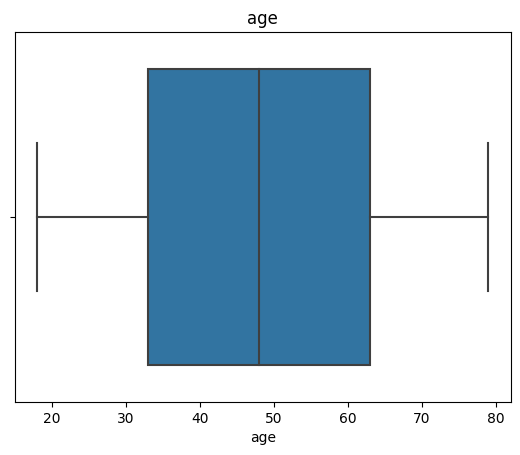

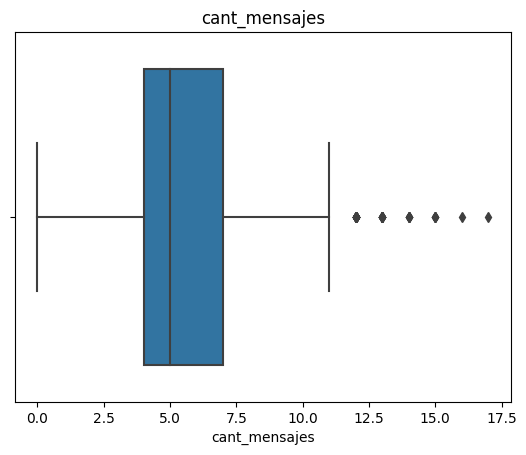

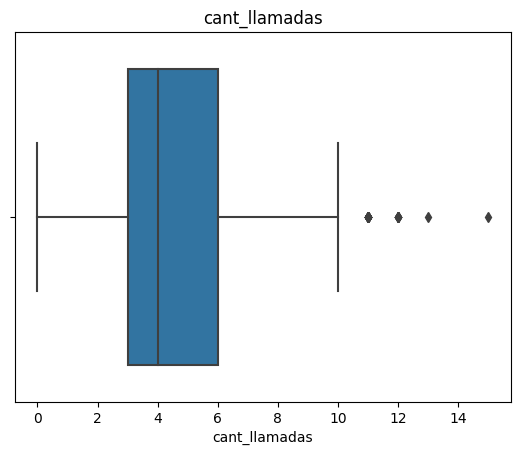

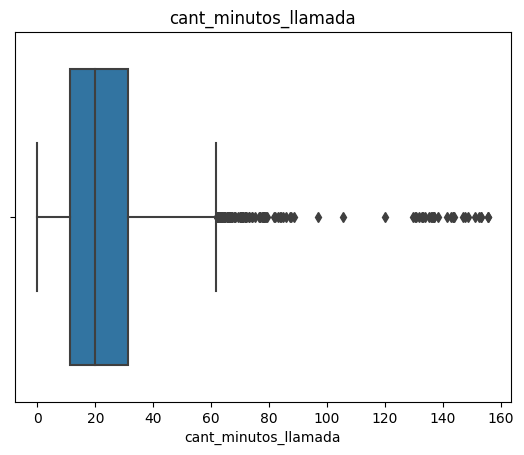

In [34]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for columna in columnas_numericas:
    sns.boxplot(data=user_profile, x=columna)
    plt.title(columna)
    plt.show()

💡Insights: 
- Age: ...no presenta outliers, tiene una distribución centrada y simetrica
- cant_mensajes: ... tiene sesgo a la derecha y vemos outliers en ese lado
- cant_llamadas: ... tiene una pequeña cantidad de outliers del lado derecho
- cant_minutos_llamada: ... vemos muchos outliers hacia la derecha 

In [42]:

# Calcular límites con el método IQR
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for columna in columnas_limites:
    Q1 = user_profile[columna].quantile(0.25)
    print('Primer cuartil: ', Q1)

    Q3 = user_profile[columna].quantile(0.75)
    print('Tercer cuartil: ', Q3)

    IQR = Q3 - Q1
    print('IQR: ', IQR)


Primer cuartil:  33.0
Tercer cuartil:  63.0
IQR:  30.0
Primer cuartil:  4.0
Tercer cuartil:  7.0
IQR:  3.0
Primer cuartil:  3.0
Tercer cuartil:  6.0
IQR:  3.0
Primer cuartil:  11.12
Tercer cuartil:  31.415
IQR:  20.295


In [36]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?
  Si, mantednría los outliers ya que muestran información real e importante y que no da información que parezca erronea
- cant_llamadas: mantener o no outliers, porqué?
  De igual manera los mantendría ya que la información es real importate y no muy lejana al IQR
- cant_minutos_llamada: mantener o no outliers, porqué?
  En este caso se ven valores muccho más grandes, sin embargo, yo los conservaria ya que a pesar de que se alejan mucho si son datos que pueden ser reales

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [49]:
# Crear columna grupo_uso


user_profile['grupo_uso'] = np.where(
    (user_profile['cant_llamadas'] <5) & (user_profile['cant_mensajes'] <5), 'Bajo uso', 
        np.where((user_profile['cant_llamadas'] <10) & (user_profile['cant_mensajes'] <10), 'Uso medio', 'Alto uso'))



In [50]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [51]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = np.where(
    (user_profile['age'] <30), 'Joven', 
        np.where((user_profile['age'] <60), 'Adulto', 'Adulto mayor'))


In [52]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

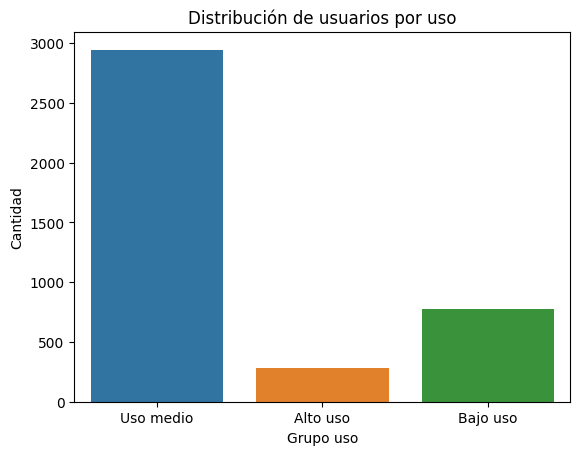

In [53]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Distribución de usuarios por uso')
plt.xlabel('Grupo uso')
plt.ylabel('Cantidad')
plt.show()

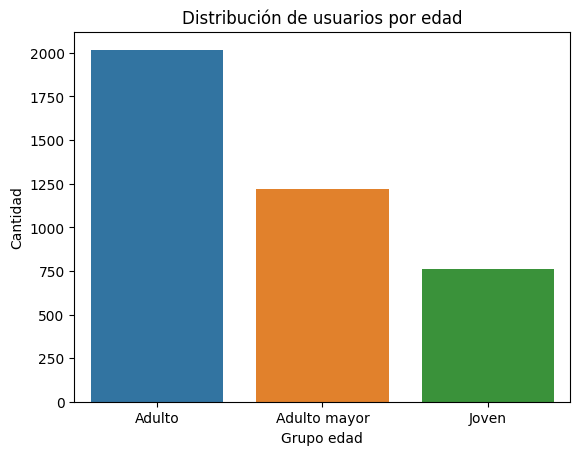

In [54]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Distribución de usuarios por edad')
plt.xlabel('Grupo edad')
plt.ylabel('Cantidad')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**

-En el dataset user, la columna city no se cuentan con el 11.72 % de los datos y en la columna churn date no se cuenta con el 88.35%. Para el dataset usage a la columna  date le faltan el 0.12 % de datos, en duration tenemos el 55.19% de valores faltantes y 44.74% en la columna length  

Observamos outliers en las columnas cantidad de mensajes, llamada y minutos llamada  hacia la derecha; esto nos habla que existen valores mas allá de lo normal pero en el caso de las 3 columnas son valores validos que nos hablan por ejemplo de cantidades pequeñas de usuarios que mandaron un mensaje muy largo, tuvieron muchas llamadas o llamadas muy largas.



🔍 **Segmentos por Edad**

- Para el caso de clientes de acuerdo a su uso encontramos 3 clasificaciones, uso bajo, medio y alto; siendo uso medio el que mayor cantidad de usuarios cuenta con más de 2500 registros, atrás se encuentra bajo consumo con entre 500 y 1000 registros y alto uso no tuvo ni 500 lo que nos habla de una tendencia razonable donde la mayoría de usuarios tiene un uso moderado y muy pocos usuarios un alto uso.


📊 **Segmentos por Nivel de Uso**

- Para el caso de clientes por edad también encontramos 3 clasificaciones joven, adulto y adulto mayor; aqui observamos que la mayoría de nuestros clientes son del grupo de adultos con alrededor de 2000 registros, adulto mayor es la siguiente categoría con 1250 registros y joven con 750; esto nos habla que la mayoría de clientes son los adultos pero también hay muchos adultos mayores, donde hay oportunidad es en los clientes jovenes.


➡️ Esto sugiere que ...

El segmento más valioso es el de uso medio con adultos ya que ahi es donde esta la mayor concentración, sin embargo también es importante destacar que la categoría de adultos mayores también es muy valioso pues representa más del 30% de los usuarios


💡 **Recomendaciones**

- Primero resaltaría que el foco debe mantenerse en los usuarios de uso medio ya que representan casi el 75% de usuarios; siguiendo el análisis por grupo de uso, buscaría crecer el porcentaje de clientes de alto uso. Respecto al análisis por edad aqui es donde veo que se puede hacer más, por una parte seguir cuidando a los clientes adultos que representan cerca del 50% pero la mayor oportunidad se presenta en clientes jovenes ya que tienen muy poca participación
Recomendaría planes enfocados en los jovenes con ofertas para atraer más clientes.



---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`